# 02 Diversity

In [ ]:
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
scripts_dir = "src"
data_dir = "../data"

## Rarefaction

We used alpha rarefaction to evaluate how sequencing depth affects within-sample diversity and to select a depth that preserves both diversity estimates and sample retention. Depths of 20 000 and 15 000 reads would have removed many samples without providing meaningful improvements in diversity estimates. The Shannon curves showed a steep rise up to roughly 5 000 reads and then reached a near-plateau between 5 000 and 10 000 reads, which indicates that the overall community structure is already captured in this range. The observed-features curves increased more slowly and did not fully plateau, which is expected for richness metrics, but the additional features gained beyond 9 000 reads were small compared with the large rise at low depths. 

9 000 reads therefore retain almost all samples while still lying in the stability range indicated by the Shannon curves. We therefore set the sampling depth to 9 000 reads as a balanced choice that preserves diversity saturation and maximizes sample retention.


We then compared k-mer sizes 12, 14, and 16 to identify the parameter that best preserves within-sample diversity patterns across the 2-, 4-, and 6-month groups.

We first tested how k-mer size affects within-sample diversity: Shannon entropy and Pielou’s evenness remained nearly identical across all three k-mer sizes.
This stability shows that alpha-diversity estimates do not depend on the k-mer choice and that the observed patterns are not artifacts of the parameter.
Because k-mer 12 reproduced the same diversity structure as k-mer 14 and 16 but with fewer computational demands, it offered the most efficient representation.
We also checked how the first two PCoA axes from Bray–Curtis behaved: The cumulative variance explained declined slightly with increasing k-mer size (48% -> 47%->46%).
This trend supported the broader impression that larger k-mers did not capture additional structure.

We therefore selected k-mer 12 because it produced stable Shannon and Pielou estimates that matched those from larger k-mers while avoiding unnecessary parameter inflation. The alpha-diversity consistency across 12, 14, and 16 provided the strongest evidence that k-mer 12 is the appropriate and efficient choice for downstream analyses. The code for this comparison analysis can be found in the archive folder. 


In [14]:
! sh {scripts_dir}/diversity_alpha.sh

sh: src/diversity_alpha.sh: No such file or directory


In [4]:
Visualization.load(f"{data_dir}/processed/alpha_rarefaction.qzv")

<visualization: Visualization uuid: 94edec53-1328-49f6-bfe7-d5d0caa7797b>

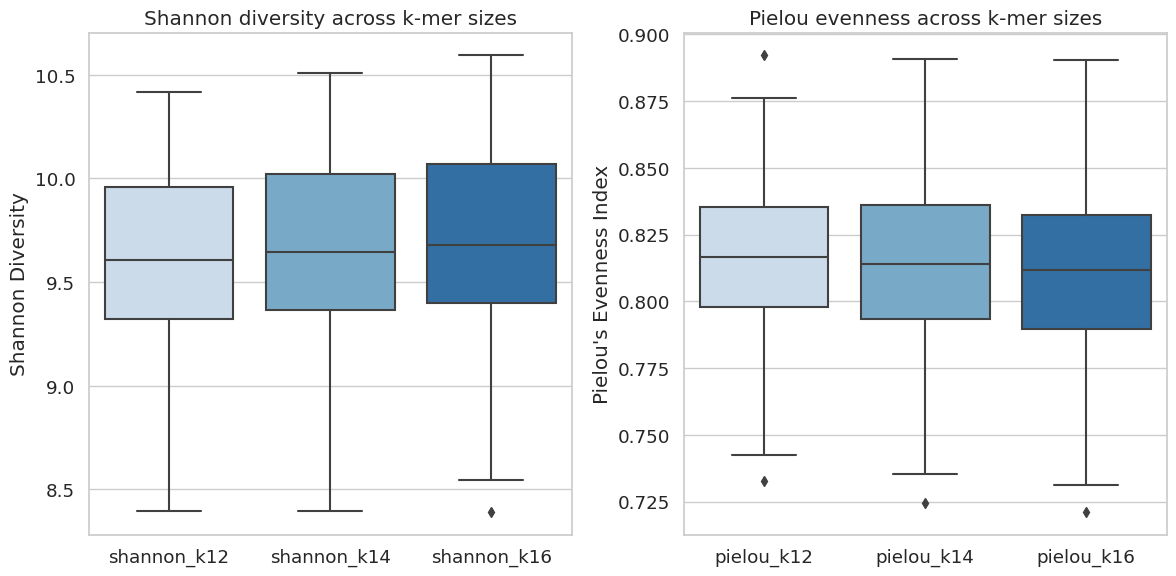

In [ ]:
data_dir = "../data/raw"

# Read Shannon diversity
shannon12 = pd.read_csv(f"{data_dir}/shannon_12/alpha-diversity.tsv", sep="\t")
shannon14 = pd.read_csv(f"{data_dir}/shannon_14/alpha-diversity.tsv", sep="\t")
shannon16 = pd.read_csv(f"{data_dir}/shannon_16/alpha-diversity.tsv", sep="\t")

shannon12.rename(columns={"Unnamed: 0": "SampleID", "shannon_entropy": "shannon_k12"}, inplace=True)
shannon14.rename(columns={"Unnamed: 0": "SampleID", "shannon_entropy": "shannon_k14"}, inplace=True)
shannon16.rename(columns={"Unnamed: 0": "SampleID", "shannon_entropy": "shannon_k16"}, inplace=True)

merged_shannon = shannon12.merge(shannon14, on="SampleID").merge(shannon16, on="SampleID")

# Read Pielou evenness
pielou12 = pd.read_csv(f"{data_dir}/pielou_12/alpha-diversity.tsv", sep="\t")
pielou14 = pd.read_csv(f"{data_dir}/pielou_14/alpha-diversity.tsv", sep="\t")
pielou16 = pd.read_csv(f"{data_dir}/pielou_16/alpha-diversity.tsv", sep="\t")

pielou12.rename(columns={"Unnamed: 0": "SampleID", "pielou_evenness": "pielou_k12"}, inplace=True)
pielou14.rename(columns={"Unnamed: 0": "SampleID", "pielou_evenness": "pielou_k14"}, inplace=True)
pielou16.rename(columns={"Unnamed: 0": "SampleID", "pielou_evenness": "pielou_k16"}, inplace=True)

merged_pielou = pielou12.merge(pielou14, on="SampleID").merge(pielou16, on="SampleID")

# Visualization
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=merged_shannon[["shannon_k12","shannon_k14","shannon_k16"]],
            ax=axes[0], palette="Blues")
axes[0].set_ylabel("Shannon Diversity")
axes[0].set_title("Shannon diversity across k-mer sizes")

sns.boxplot(data=merged_pielou[["pielou_k12","pielou_k14","pielou_k16"]],
            ax=axes[1], palette="Blues")
axes[1].set_ylabel("Pielou's Evenness Index")
axes[1].set_title("Pielou evenness across k-mer sizes")

plt.tight_layout()

# Ensure save directory exists
os.makedirs("/home/jovyan/microbEvolve2/data/processed", exist_ok=True)
plt.savefig("/home/jovyan/microbEvolve2/data/processed/figure_diversity_comparison.png", dpi=300)

plt.show()
